# Logist Regression Project - Advertising Data

__Data set description__: data regarding whether a particular internet user clicked on the advertisement or not.

__Goal__: predict whether the user will click on the ad based on a particular feature.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
ad_data = pd.read_csv('advertising.csv')

### Exploratory Data Analysis

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [16]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

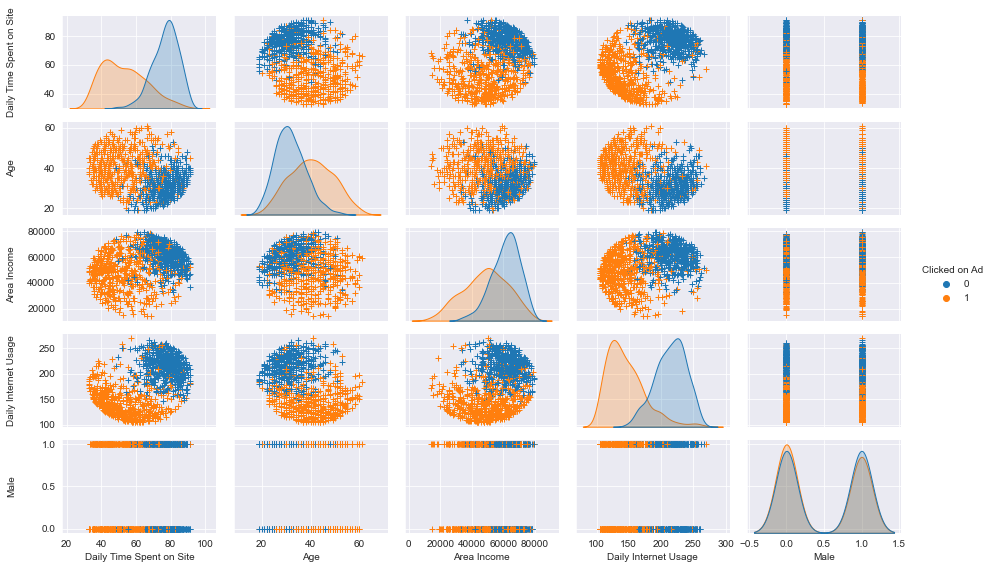

In [13]:
# pairplot to check for correlations between features and with the 'Clicked on Ad' feature

sns.set_style("darkgrid")

g = sns.pairplot(ad_data, hue='Clicked on Ad', height=1.6, aspect=1.6, plot_kws=dict(marker="+", linewidth=1))
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.3,0.5);

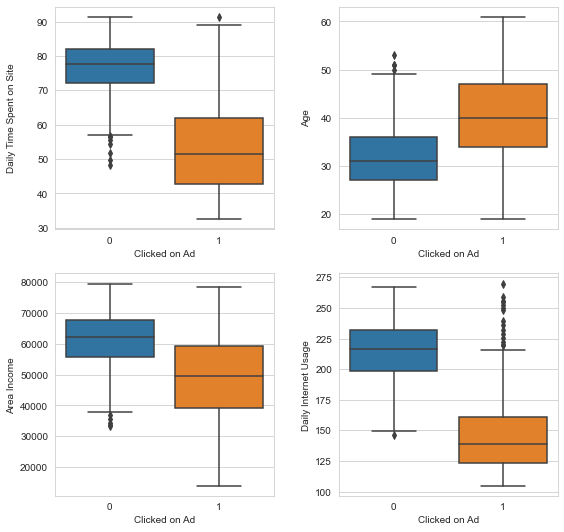

In [198]:
# boxplots of some important quantitative features with respect to 'Clicked on Ad'
# take-away: user who clicked the ad typcially spends less time on the site, less time on the internet in general,
# lives in a lower income area, and is typically older, around middle-age. 

sns.set_style("whitegrid")
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

fig, axes = plt.subplots(2, 2)
fig.subplots_adjust(wspace=0.3, hspace=0.2)
fig.align_ylabels()
fig.set_size_inches(9,9)

axes = axes.flatten()
for i in range(4):
    sns.boxplot(x="Clicked on Ad", y=features[i], data=ad_data, ax=axes[i])


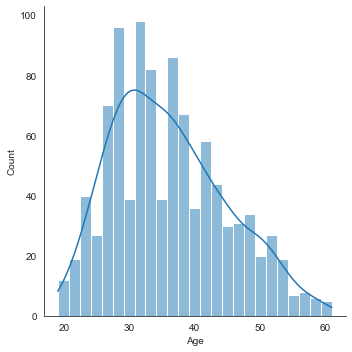

In [169]:
# Distribution plot of age. We know the mean is about 36 years old.

sns.set_style("white")
sns.displot(ad_data['Age'], kde=True, bins=25);


Pearson's correlation coefficient: -0.183
p-value: 0.0000



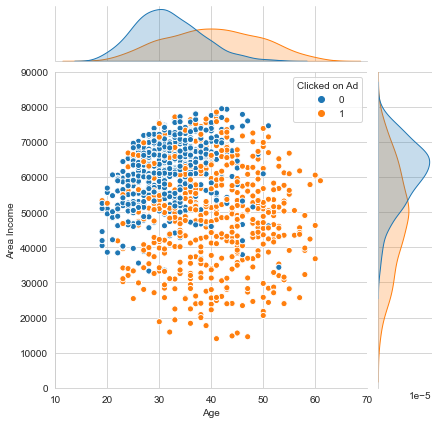

In [192]:
# jointplot of the features 'Area Income' and 'Age' with respect to 'Cliked on Ad'.

sns.set_style("whitegrid")

r, p = stats.pearsonr(ad_data['Area Income'], ad_data['Age'])
print("""
Pearson's correlation coefficient: {:.3f}
p-value: {:.4f}
""".format(r, p))

plot = sns.jointplot(x='Age', y='Area Income', data=ad_data, 
             hue='Clicked on Ad', 
             marker=".", s=150)
plot.ax_marg_x.set_xlim(10, 70)
plot.ax_marg_y.set_ylim(0, 90000);

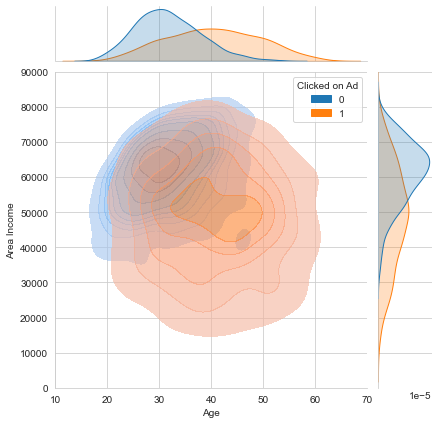

In [194]:
# kde plot of the features 'Area Income' and 'Age' with respect to 'Cliked on Ad'.

plot = sns.jointplot(x='Age', y='Area Income', data=ad_data, 
             hue='Clicked on Ad',
             kind='kde', fill=True, joint_kws={'alpha': 0.6})
plot.ax_marg_x.set_xlim(10, 70)
plot.ax_marg_y.set_ylim(0, 90000);


Pearson's correlation coefficient: -0.332
p-value: 0.0000



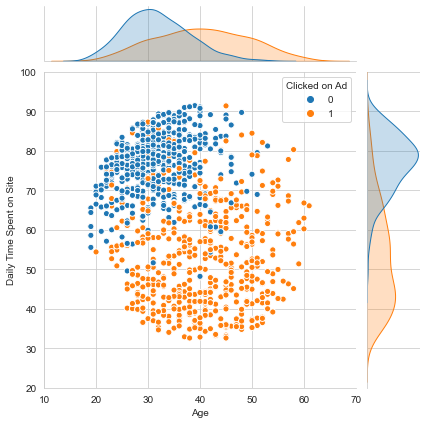

In [195]:
# jointplot of the features 'Daily Time Spent on Site' and 'Age' with respect to 'Cliked on Ad'.

r, p = stats.pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Age'])
print("""
Pearson's correlation coefficient: {:.3f}
p-value: {:.4f}
""".format(r, p))

plot = sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, 
             hue='Clicked on Ad', 
             marker=".", s=150)
plot.ax_marg_x.set_xlim(10, 70)
plot.ax_marg_y.set_ylim(20, 100);


Pearson's correlation coefficient: 0.519
p-value: 0.0000



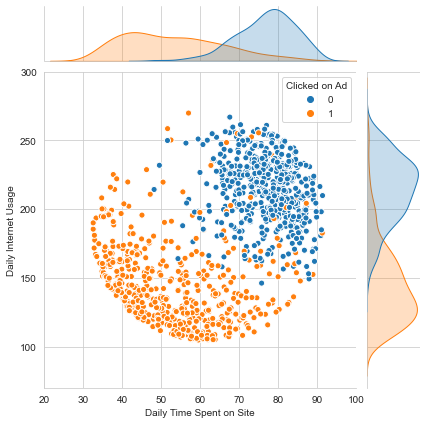

In [196]:
# jointplot of the features 'Daily Time Spent on Site' and 'Daily Internet Usage' with respect to 'Cliked on Ad'.

r, p = stats.pearsonr(ad_data['Daily Time Spent on Site'], ad_data['Daily Internet Usage'])
print("""
Pearson's correlation coefficient: {:.3f}
p-value: {:.4f}
""".format(r, p))

plot = sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data, 
             hue='Clicked on Ad', 
             marker=".", s=150)
plot.ax_marg_x.set_xlim(20, 100)
plot.ax_marg_y.set_ylim(70, 300);

### Training Features

In [30]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [31]:
# Need to build a traing data set. Some features will be dropped, like country, city, etc.
# For now we are interested in age, sex, time spent on site/internet, and income.
# We do not need to transform the data using dummy variables.

train = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0


In [32]:
# features to train on
X = train
# target values
y = ad_data['Clicked on Ad']

### Logistic Regression Modelling

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# Splitting data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = LogisticRegression() # try max_iter=250, if algorithm does not converge

In [37]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

### Evaluation

In [69]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [58]:
logmodel.coef_.resize((5,1))

In [59]:
coeff_df = pd.DataFrame(logmodel.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Daily Time Spent on Site,-0.051243
Age,0.236158
Area Income,-0.000010
Daily Internet Usage,-0.024683
Male,0.001077
